# Classifying Tweet Sentiments with Machine Learning

## Research Question:

**How can natural language processing (NLP) techniques be used to analyze and classify the sentiment of social media posts (e.g., tweets) as positive, negative, or neutral?**


### Methodology:

First, I imported the necessary libraries and loaded the dataset to examine the dataset.

In [180]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Loading in the data. Using "encoding='latin-1'" so that computer doesn't have issues understanding special characters.
data = pd.read_csv('/Users/shanzeowais/Projects/Social Media Sentiment Analysis/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

#Specifying the names of the columns in the dataset
data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Tweet']

#Print the first 5 rows of the dataset!
data.head()

,Sentiment,ID,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Next, I cleaned the data.

In [159]:
#Focus on the two columns: 'Sentiment' and 'Tweet'
data = data[['Sentiment', 'Tweet']]

#Map sentiment values to labels
data['Sentiment'] = data['Sentiment'].map({0: 'Negative', 2: 'Neutral', 4: 'Positive'})

print(data['Sentiment'].value_counts())

Sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64


In [160]:
#I wanted to make sure that Negative and Positive were the only values in the Sentiment category
print(data['Sentiment'].unique())

['Negative' 'Positive']


In [161]:
#Create a function that removes URLS, mentions, hashtags, and special characters
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#', '', text)          # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)     # Remove special characters
    return text.lower()

#'Cleaned_Tweet' stores the result of the cleaned 'Tweet' column
data['Cleaned_Tweet'] = data['Tweet'].apply(clean_text)

#Remove 'Tweet' column
data.drop(columns=['Tweet'], inplace=True)

Then, I conducted Exploratory Data Analysis (EDA).

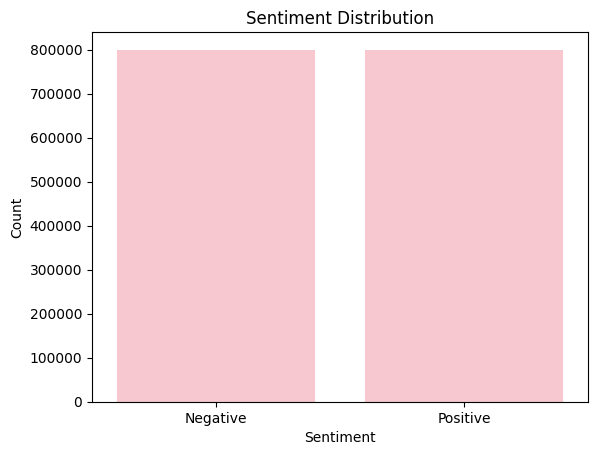

In [163]:
sns.countplot(x='Sentiment', data=data, color='pink')
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.show()

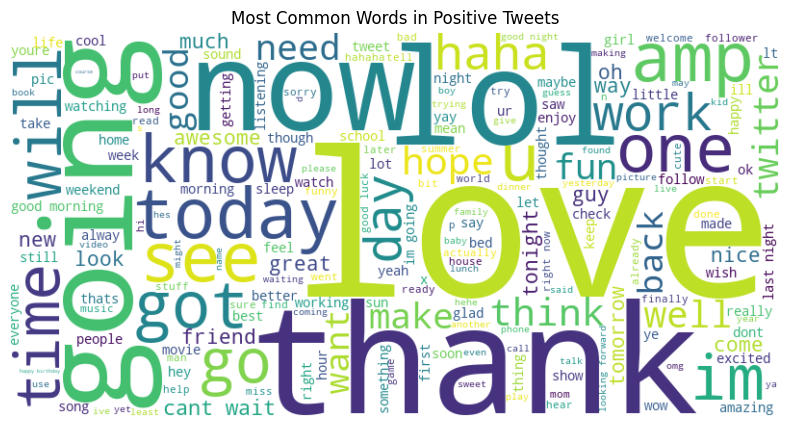

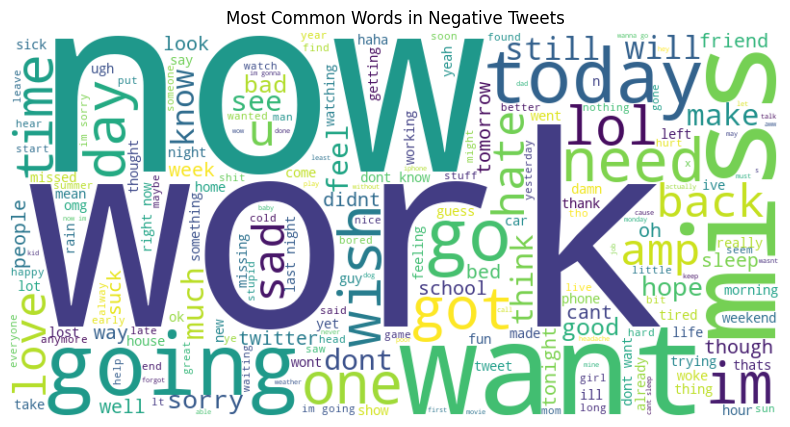

In [164]:
for sentiment in ['Positive', 'Negative']:

    #Filters data for current sentiment
    sentiment_data = data[data['Sentiment'] == sentiment]

    #Combines tweets into one string
    text = ' '.join(sentiment_data['Cleaned_Tweet'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Common Words in {sentiment} Tweets')
    plt.axis('off')
    plt.show()


In this next part, I will reduce dimensionality by focusing on the top 5000 most important words based on TF-IDF scores.

**What is a TF-IDF score?**

Term Frequency (TF): Counts how often a word appears in a document.

Inverse Document Frequency (IDF): Measures how unique or rare a word is across the entire corpus. Words that appear in many documents will have a lower IDF score.

TF-IDF score: The product of TF and IDF gives a weighted score for each word that reflects its importance in a specific document relative to the whole dataset.

In [166]:
#Keeps the top 5000 most important words
tfidf = TfidfVectorizer(max_features=5000)

#X contains the numerical representation of the tweets, where each tweet is represented as a vector of TF-IDF scores for the top 5000 words.
X = tfidf.fit_transform(data['Cleaned_Tweet'])

#Y contains the sentiment labels
Y = data['Sentiment']

Next, I trained a classification model.

In [178]:
#Split data into a training set and a testing set. 20% of the data will be used for testing, and 80% will be used for training the model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Trains a logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

#Make the predictions on the test set
predictions = model.predict(X_test)

#Prints out a classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79    159494
    Positive       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



Now it's time to visualize the model's performance!

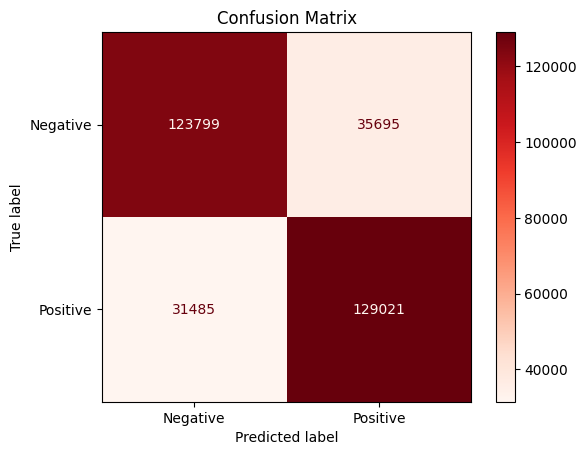

In [194]:
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

Lastly, I am going to apply the model to a tweet I create to test the model.

In [204]:
new_tweet = ["I love the data science, it's so cool!"]

cleaned_tweet = [clean_text(tweet) for tweet in new_tweet]

tweet_vector = tfidf.transform(cleaned_tweet)

sentiment_prediction = model.predict(tweet_vector)

print(f"The predicted sentiment for the tweet is: {sentiment_prediction[0]}")

The predicted sentiment for the tweet is: Positive


# Conclusion

In this project, we applied natural language processing (NLP) techniques to classify the sentiment of social media posts, specifically tweets, as **Positive**, **Negative**, or **Neutral**. Here's a summary of the key steps, findings, and outcomes of the project:

### 1. Data Preprocessing:
- We started by cleaning the text data, removing irrelevant parts such as URLs, hashtags, mentions, and special characters, and standardizing the text by converting it to lowercase. This ensured the data was in a format suitable for analysis and machine learning.
   
### 2. Feature Extraction:
- We used **TF-IDF vectorization** to convert the text data into numerical features, capturing the importance of words in each tweet while reducing the impact of less informative terms. We limited the number of features to the top 5000 words to control for dimensionality.

### 3. Model Training:
- We trained a **Logistic Regression** model using the preprocessed and vectorized tweet data. The model was split into training and testing sets, with 80% of the data used for training and 20% for testing.
   
### 4. Model Evaluation:
- After training, the model was evaluated on the test set, where it achieved an **accuracy of 79%**. The classification report showed balanced performance across sentiment categories, with an F1-score of 0.79 for both **Negative** and **Positive** sentiments.
- The confusion matrix revealed that the model was generally accurate but occasionally misclassified tweets, particularly with 35,695 false positives and 31,485 false negatives. This indicates that while the model performed well, there was some room for improvement in distinguishing between similar sentiments.

### 5. Key Insights:
- The model demonstrated a good overall performance with a solid accuracy rate, suggesting that **Logistic Regression** can effectively classify sentiment in social media posts.
- The confusion matrix highlighted that the model had a slight bias toward predicting "Positive" sentiment over "Negative" sentiment, which can be addressed with further fine-tuning.

### Future Directions:
- **Improvement of Model Performance**: To improve performance, we can explore more sophisticated models, such as **Support Vector Machines** (SVM) or **Deep Learning** techniques like **LSTM** or **BERT**, which may capture more complex patterns in the data.
- **Handling Neutral Sentiment**: Since neutral tweets were less represented, the model can be adjusted or retrained with a more balanced dataset, or techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) could be used to address class imbalances.
- **Additional Features**: Incorporating additional features such as user metadata, tweet engagement, or linguistic features (e.g., sentiment lexicons) could further enhance the model's accuracy and generalization.

In conclusion, the project successfully demonstrated the application of NLP for sentiment analysis on social media data, with practical implications for understanding public sentiment and trends. However, further improvements could help the model better distinguish between the sentiments and handle edge cases more effectively.